Activity: Walking
Date: 01/12/2022
Start Time: 14:06:29
Duration: 01:57:01
Distance: 5.81 km
Calories: 685 kcal
Average HR: 100 bpm
Min HR: 76 bpm
Max HR: 148 bpm

Time spent in:
Zone 1: 01:09:07
Zone 2: 00:15:59
Zone 3: 00:01:44
Zone 4: 00:00:00
Zone 5: 00:00:00

Session Score: 102


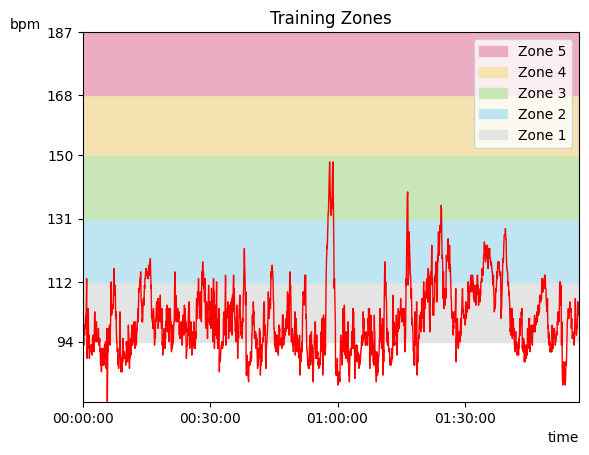

In [6]:
import matplotlib.pyplot as plt
import pandas

data = pandas.read_csv("sample-data.csv")

HR_list = data['Date'][2:].astype(int).tolist()
Time_list = data['Sport'][2:].tolist()

print(f"Activity: {data['Sport'][0].title()}")
print(f"Date: {data['Date'][0]}")
print(f"Start Time: {data['Start time'][0]}")
print(f"Duration: {data['Duration'][0]}")
print(f"Distance: {data['Total distance (km)'][0]} km")
print(f"Calories: {round(data['Calories'][0])} kcal")
print(f"Average HR: {data['Average heart rate (bpm)'][0]} bpm")
print(f"Min HR: {min(HR_list)} bpm")
print(f"Max HR: {max(HR_list)} bpm\n")

hr_max = round(data['HR max'][0])
zone_1 = [round(hr_max * 0.5), round(hr_max * 0.6) - 1]
zone_2 = [round(hr_max * 0.6), round(hr_max * 0.7) - 1]
zone_3 = [round(hr_max * 0.7), round(hr_max * 0.8) - 1]
zone_4 = [round(hr_max * 0.8), round(hr_max * 0.9) - 1]
zone_5 = [round(hr_max * 0.9), hr_max]

hr_in_zone_1 = []
hr_in_zone_2 = []
hr_in_zone_3 = []
hr_in_zone_4 = []
hr_in_zone_5 = []

for hr in HR_list:
    if hr >= zone_1[0] and hr <= zone_1[1]:
        hr_in_zone_1.append(hr)
    elif hr >= zone_2[0] and hr <= zone_2[1]:
        hr_in_zone_2.append(hr)
    elif hr >= zone_3[0] and hr <= zone_3[1]:
        hr_in_zone_3.append(hr)
    elif hr >= zone_4[0] and hr <= zone_4[1]:
        hr_in_zone_4.append(hr)
    elif hr >= zone_5[0] and hr <= hr_max:
        hr_in_zone_5.append(hr)

time_in_zone_1 = len(hr_in_zone_1)
time_in_zone_2 = len(hr_in_zone_2)
time_in_zone_3 = len(hr_in_zone_3)
time_in_zone_4 = len(hr_in_zone_4)
time_in_zone_5 = len(hr_in_zone_5)

hours_zone_1, minutes_zone_1 = divmod(time_in_zone_1, 3600)
minutes_zone_1, seconds_zone_1 = divmod(minutes_zone_1, 60)
hours_zone_2, minutes_zone_2 = divmod(time_in_zone_2, 3600)
minutes_zone_2, seconds_zone_2 = divmod(minutes_zone_2, 60)
hours_zone_3, minutes_zone_3 = divmod(time_in_zone_3, 3600)
minutes_zone_3, seconds_zone_3 = divmod(minutes_zone_3, 60)
hours_zone_4, minutes_zone_4 = divmod(time_in_zone_4, 3600)
minutes_zone_4, seconds_zone_4 = divmod(minutes_zone_4, 60)
hours_zone_5, minutes_zone_5 = divmod(time_in_zone_5, 3600)
minutes_zone_5, seconds_zone_5 = divmod(minutes_zone_5, 60)
minutes_in_zone_1 = int(time_in_zone_1/60)
minutes_in_zone_2 = int(time_in_zone_2/60)
minutes_in_zone_3 = int(time_in_zone_3/60)
minutes_in_zone_4 = int(time_in_zone_4/60)
minutes_in_zone_5 = int(time_in_zone_5/60)

def convertTime(h, m, s):
    if (h < 10):
        h = "0" + str(h)
    if (m < 10):
        m = "0" + str(m)
    if (s < 10):
        s = "0" + str(s)
    return f"{h}:{m}:{s}"

print("Time spent in:")
print(f"Zone 1: {convertTime(hours_zone_1, minutes_zone_1, seconds_zone_1)}")
print(f"Zone 2: {convertTime(hours_zone_2, minutes_zone_2, seconds_zone_2)}")
print(f"Zone 3: {convertTime(hours_zone_3, minutes_zone_3, seconds_zone_3)}")
print(f"Zone 4: {convertTime(hours_zone_4, minutes_zone_4, seconds_zone_4)}")
print(f"Zone 5: {convertTime(hours_zone_5, minutes_zone_5, seconds_zone_5)}\n")

session_score = minutes_in_zone_1 + minutes_in_zone_2 * 2 + \
    minutes_in_zone_3 * 3 + minutes_in_zone_4 * 4 + minutes_in_zone_5 * 5
print(f"Session Score: {session_score}")

x = Time_list
y = HR_list
vertical_ticks = [zone_1[0], zone_2[0], zone_3[0], zone_4[0], zone_5[0], hr_max]

plt.axhspan(zone_1[0], zone_2[0], color='#E3E5E5', label='Zone 1')
plt.axhspan(zone_2[0], zone_3[0], color='#BEE5F1', label='Zone 2')
plt.axhspan(zone_3[0], zone_4[0], color='#C9E7B6', label='Zone 3')
plt.axhspan(zone_4[0], zone_5[0], color='#F4E3B1', label='Zone 4')
plt.axhspan(zone_5[0], hr_max, color='#ECADC4', label='Zone 5')

plt.plot(x, y, color='red', linewidth=1)
plt.xlabel('time', loc="right")
plt.ylabel('bpm', rotation=0, loc="top")
plt.yticks([zone_1[0], zone_2[0], zone_3[0], zone_4[0], zone_5[0], hr_max])

less_2hr_ticks = [0, 1800, 3600, 5400]
more_2hr_ticks = [0, 3600, 7200, 10800, 14400, 18000, 21600]
ticks_duration = int(data['Duration'][0][:2])
if int(data['Duration'][0][:2]) <= 1:
    plt.xticks(less_2hr_ticks)
else:
    plt.xticks(more_2hr_ticks)
plt.margins(x = 0)

h, l = plt.gca().get_legend_handles_labels()
plt.legend([h[4], h[3], h[2], h[1], h[0]], [l[4], l[3], l[2], l[1], l[0]])

plt.title("Training Zones")
plt.autoscale(enable=True, axis='y', tight=True)
plt.show()